#**Actividad 9: Redes neuronales**
# **Adrian Alejandro Moran Alvarez 1951212 IMTC N1**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.8336 - loss: 0.5829 - val_accuracy: 0.9753 - val_loss: 0.0858
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9767 - loss: 0.0783 - val_accuracy: 0.9840 - val_loss: 0.0563
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9843 - val_loss: 0.0513
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9887 - loss: 0.0378 - val_accuracy: 0.9882 - val_loss: 0.0420
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9876 - val_loss: 0.0431
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9845 - val_loss: 0.0538
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9950 - loss: 0

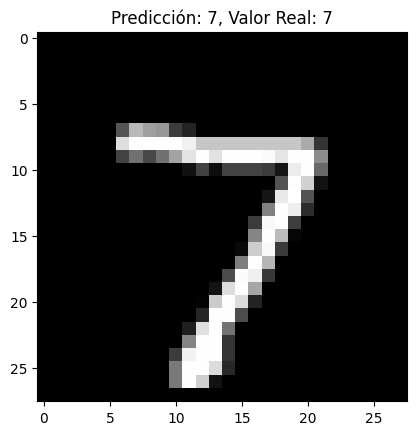

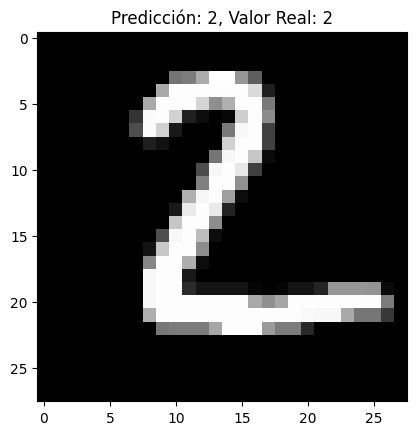

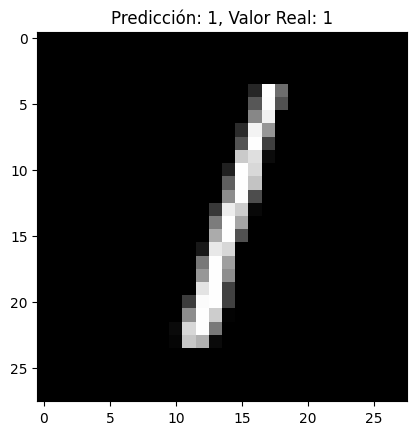

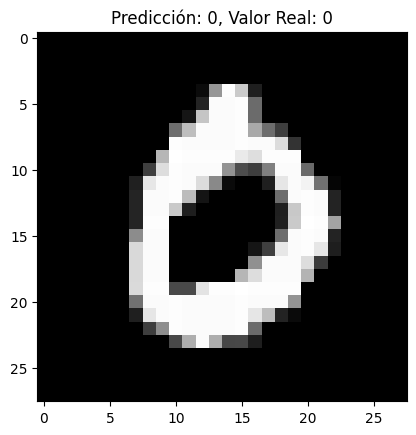

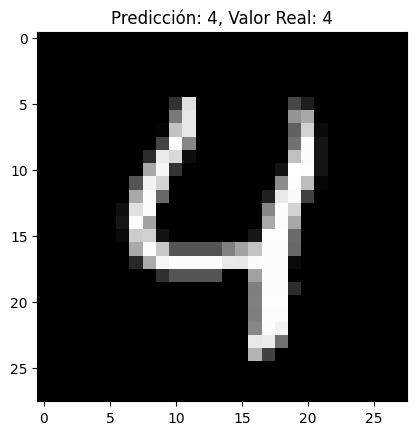

In [ ]:
# Adrian Alejandro Moran Alvarez 1951212
# Tarea 9 - Red Neuronal Convolucional (RNC)
# Inteligencia Artificial

# Cargar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Cargar datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocesamiento de datos
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Selección y entrenamiento del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Softmax para salida de 10 clases

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.4f}")

# Predicciones de ejemplo
predictions = model.predict(test_data[:5])

for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicción: {np.argmax(predictions[i])}, Valor Real: {np.argmax(test_labels[i])}")
    plt.show()

# Responde las siguientes preguntas aquí:
# - ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la actividad 5?
# - ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

